# Exploratory data analysis (EDA)
---

### ¿Qué es?

Es cuando revisamos por primera vez los datos que nos llegan, por ejemplo un archivo CSV que nos entregan y deberemos intentar comprender **¿de qué se trata?**, vislumbrar posibles patrones y reconociendo distribuciones estadísticas que puedan ser útiles en el futuro.

Lo ideal es que tengamos un objetivo que nos hayan *“adjuntado”* con los datos, que indique lo que se quiere conseguir a partir de esos datos. Por ejemplo, nos pasan un excel y nos dicen *“Queremos predecir ventas a 30 días”*, ó *“Clasificar casos malignos/benignos de una enfermedad”*, *“Queremos identificar audiencias que van a realizar re-compra de un producto”*, *“queremos hacer pronóstico de fidelización de clientes/abandonos”*, *“Quiero detectar casos de fraude en mi sistema en tiempo real”*.

### ¿Que hacer cuando llegar un archivo?

- ¿Cuántos registros hay?
    - ¿Son demasiado pocos?
    - ¿Son muchos y no tenemos Capacidad (CPU+RAM) suficiente para procesarlo?
- ¿Están todas las filas completas ó tenemos campos con valores nulos?
    - En caso que haya demasiados nulos: ¿Queda el resto de información inútil?
- ¿Que datos son discretos y cuales continuos?
    - Muchas veces sirve obtener el tipo de datos: texto, int, double, float
- Si es un problema de tipo supervisado:
    - ¿Cuál es la columna de “salida”? ¿binaria, multiclase?
    - ¿Esta balanceado el conjunto salida?
- ¿Cuales parecen ser features importantes? ¿Cuales podemos descartar?
- ¿Siguen alguna distribución?
- ¿Hay correlación entre features (características)?
- En problemas de NLP es frecuente que existan categorías repetidas ó mal tipeadas, ó con mayusculas/minúsculas, singular y plural, por ejemplo “Abogado” y “Abogadas”, “avogado” pertenecerían todos a un mismo conjunto.
- ¿Estamos ante un problema dependiente del tiempo? Es decir un TimeSeries.
- Si fuera un problema de Visión Artificial: ¿Tenemos suficientes muestras de cada clase y variedad, para poder hacer generalizar un modelo de Machine Learning?
- ¿Cuales son los Outliers? (unos pocos datos aislados que difieren drásticamente del resto y “contaminan” ó desvían las distribuciones)
    - Podemos eliminarlos? es importante conservarlos?
    - son errores de carga o son reales?
- ¿Tenemos posible sesgo de datos? (por ejemplo perjudicar a clases minoritarias por no incluirlas y que el modelo de ML discrimine)


In [1]:
#Empecemos importando las librerias y el dataset a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
wine_quality = pd.read_csv('winequality-red.csv', sep = ",")

In [3]:
#Veamos las primeras 5 filas
wine_quality.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
#Dimension del dataset
print(wine_quality.shape)

(1599, 12)


¿Qué variables tenemos?
Lo primero que hay que hacer es tratar de identificar el tipo de variables que tenemos y cuáles son los features.

In [7]:
#Nombre de los atributos
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Probablemente si no somos conocedores de vinos, estasa variables tengan poco sentido para nosotros. Recordemos que idealmente, deberíamos tener conocimiento del tema sobre el cual vamos a trabajar (obvio que también podemos conseguir un experto que nos guíe 😉).

Para mayor información sobre el significado de cada variable, podemos acceder a los siguientes links:
* https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid
* https://waterhouse.ucdavis.edu/whats-in-wine
* https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
* https://www.mt.com/gb/en/home/supportive_content/ana_chem_applications/titration/AP015.html

In [8]:
#Tipo de dato para cada columna
wine_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Completitud en los datos**:
Antes de comenzar cualquier análisis, es bueno revisar los datos para buscar información faltante; y en caso de que la haya, decidir qué es lo que podemos hacer con esos registros faltantes. Con los dataframes de pandas, podemos usar la función info() para encontrar los datos faltantes. 

In [9]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
#Otra manera también de obtener la misma información, hubiese sido calcular la totalidad de registros por columnas
wine_quality.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [12]:
#Antes de analizar lo principales estadísticos, verifiquemos si tenemos como estructura de dato un dataframe!
type(wine_quality)

pandas.core.frame.DataFrame

# Estadísticas descriptivas

In [13]:
wine_quality.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [14]:
#Utilicemos la funcion round para visualizar mejor nuestros datos
wine_quality.describe().round()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count         1599.0            1599.0       1599.0          1599.0   
mean             8.0               1.0          0.0             3.0   
std              2.0               0.0          0.0             1.0   
min              5.0               0.0          0.0             1.0   
25%              7.0               0.0          0.0             2.0   
50%              8.0               1.0          0.0             2.0   
75%              9.0               1.0          0.0             3.0   
max             16.0               2.0          1.0            16.0   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count     1599.0               1599.0                1599.0   1599.0  1599.0   
mean         0.0                 16.0                  46.0      1.0     3.0   
std          0.0                 10.0                  33.0      0.0     0.0   
min          0.0                  1.0                   6.0      1.0     3.0   
25%          0.0                  7.0                  22.0      1.0     3.0   
50%          0.0                 14.0                  38.0      1.0     3.0   
75%          0.0                 21.0                  62.0      1.0     3.0   
max          1.0                 72.0                 289.0      1.0     4.0   

       sulphates  alcohol  quality  
count     1599.0   1599.0   1599.0  
mean         1.0     10.0      6.0  
std          0.0      1.0      1.0  
min          0.0      8.0      3.0  
25%          1.0     10.0      5.0  
50%          1.0     10.0      6.0  
75%          1.0     11.0      6.0  
max          2.0     15.0      8.0

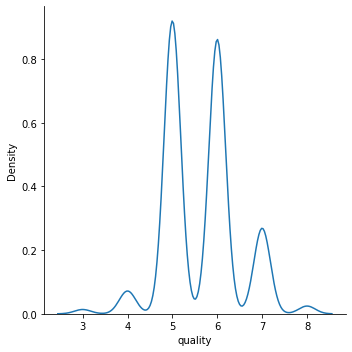

In [25]:
#Histograma
#from seaborn import distplot
#distplot(wine_quality.quality, hist=False)


# Plot a histogram for the total bill
sns.displot(wine_quality.quality,  kind="kde")
plt.show()

Como podemos observar, nuestro conjunto de datos está desbalanceado, con muchos mas 5 y 6 que cualquier otro valor.

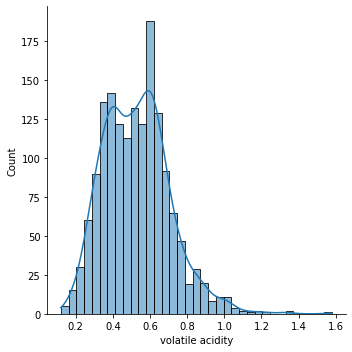

In [32]:
#Veamos otra variable!
#distplot(wine_quality["volatile acidity"])
sns.displot(wine_quality["volatile acidity"],  kde=True)


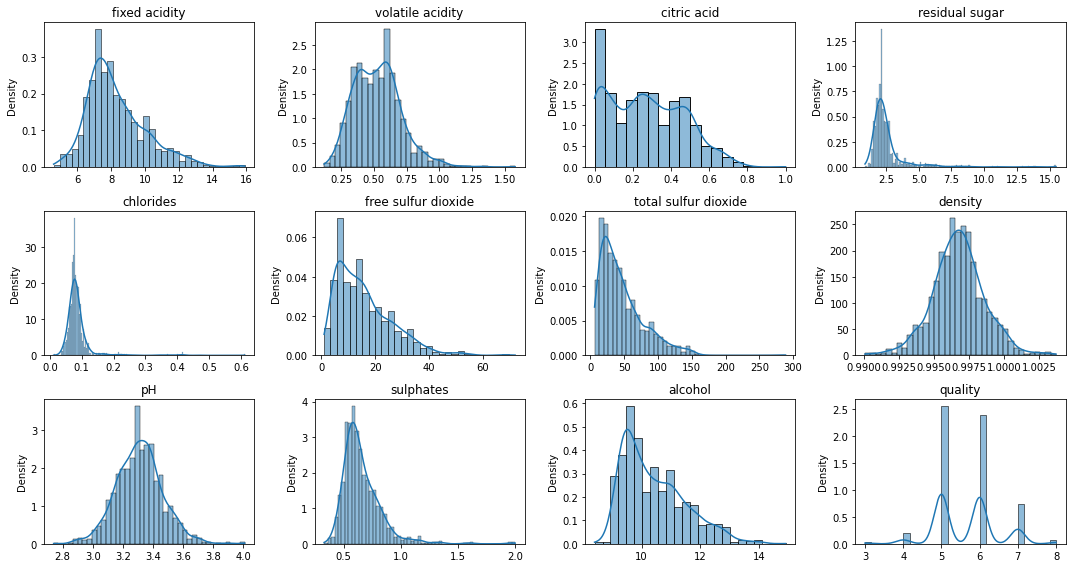

In [45]:
#Podemos usar un poco de código para visualizar más de una variable a la vez
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality']

columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(wine_quality[variable], stat="density", ax=axes[i][j], kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

De esta gráfica podemos identificar varios aspectos, como ser por ejemplo que que muchas de las variables tienen una distribución asimétrica (fixed acidity, residual sugar, chlorides, por ejemplo), además de que al parecer algunos valores presetan valores extremos (residual sugar, sulphates, total sulfur dioxide).

# Boxplots
Como sabemos los boxplots nos permiten analizar y ver de una manera muy rápida qué variables tienen valores extremos.

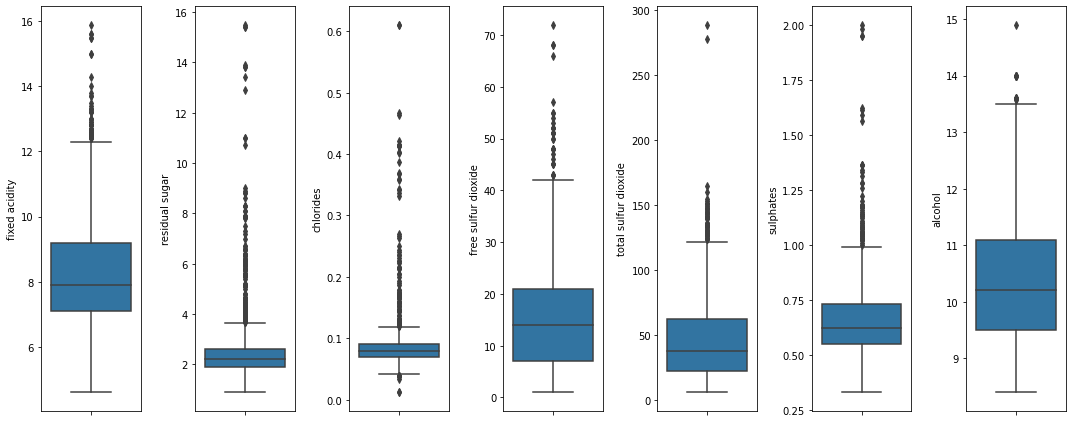

In [46]:
variables = ['fixed acidity', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide','sulphates', 'alcohol']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=wine_quality, ax=ax)
plt.tight_layout()

# Scatterplots
Ahora tratemos de identificar de una manera rápida y visual la correlación entre variables!

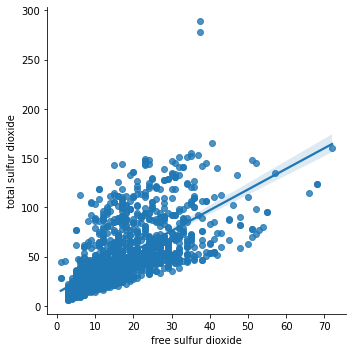

In [47]:
from seaborn import lmplot
lmplot(x='free sulfur dioxide', y='total sulfur dioxide', data=wine_quality, fit_reg=True) 

En la gráfica anterior, si se puede observar una clara relación entre las variables analizadas. También podemos
hacer uso de la Matriz de Correlación si quisieramos ver por ejemplo el coeficiente de **Pearson**

In [48]:
correlation = wine_quality.corr(method="pearson")
correlation.head()

fixed acidity  volatile acidity  citric acid  \
fixed acidity          1.000000         -0.256131     0.671703   
volatile acidity      -0.256131          1.000000    -0.552496   
citric acid            0.671703         -0.552496     1.000000   
residual sugar         0.114777          0.001918     0.143577   
chlorides              0.093705          0.061298     0.203823   

                  residual sugar  chlorides  free sulfur dioxide  \
fixed acidity           0.114777   0.093705            -0.153794   
volatile acidity        0.001918   0.061298            -0.010504   
citric acid             0.143577   0.203823            -0.060978   
residual sugar          1.000000   0.055610             0.187049   
chlorides               0.055610   1.000000             0.005562   

                  total sulfur dioxide   density        pH  sulphates  \
fixed acidity                -0.113181  0.668047 -0.682978   0.183006   
volatile acidity              0.076470  0.022026  0.234937  -0.260987   
citric acid                   0.035533  0.364947 -0.541904   0.312770   
residual sugar                0.203028  0.355283 -0.085652   0.005527   
chlorides                     0.047400  0.200632 -0.265026   0.371260   

                   alcohol   quality  
fixed acidity    -0.061668  0.124052  
volatile acidity -0.202288 -0.390558  
citric acid       0.109903  0.226373  
residual sugar    0.042075  0.013732  
chlorides        -0.221141 -0.128907

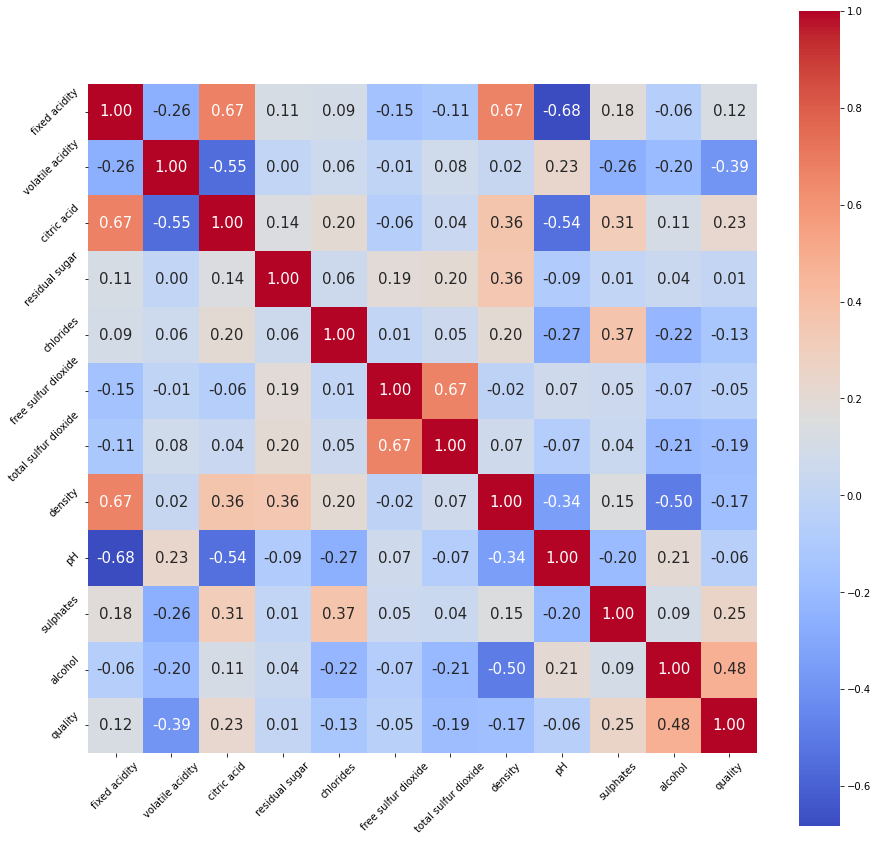

In [49]:
#Resulta más intuitivo ver la matriz de correlación a través de un gráfico - heatmap de seaborn

plt.figure(figsize=(15,15)) #Defino el tamaño del grafico

#Genero el mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

# Complemento 😉

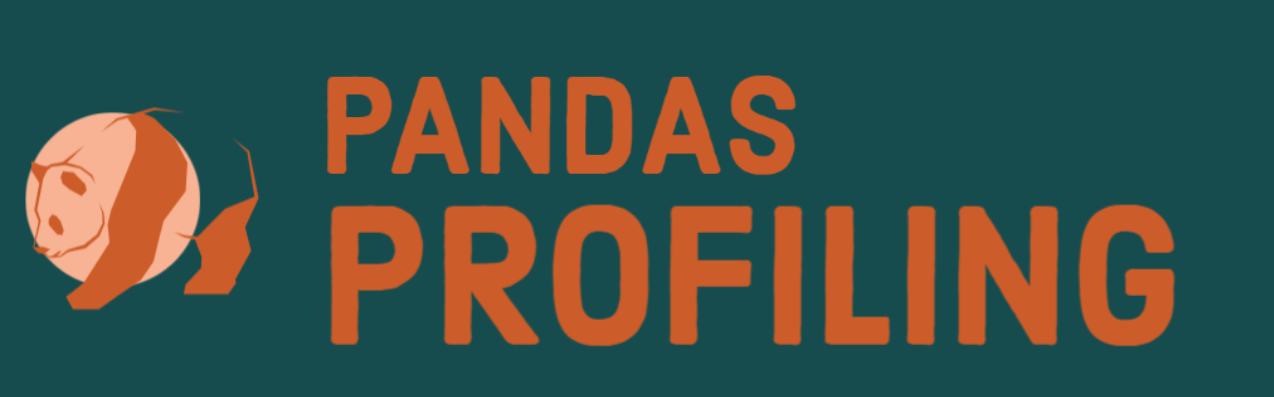

Pandas profiling, es un módulo de Python de código abierto con el que podemos hacer rápidamente un análisis de datos exploratorio con solo unas pocas líneas de código. También nos genera informes interactivos en formato web.

Link de interés: https://pandas-profiling.ydata.ai/docs/master/index.html

In [2]:
pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     |████████████████████████████████| 21.8 MB 1.6 MB/s eta 0:00:011     |████████████████████▎           | 13.8 MB 24.0 MB/s eta 0:00:01
  Using cached pydantic-1.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
     |████████████████████████████████| 102 kB 2.3 MB/s eta 0:00:01
  Using cached MarkupSafe-2.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Using cached networkx-2.8.2-py3-none-any.whl (2.0 MB)
  Using cached ImageHash-4.2.1.tar.gz (812 kB)
  Using cached PyWavelets-1.3.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.9 MB)
  ERROR: Command errored out with exit status 1:
   command: '/mnt/c/Users/betof/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Repositorios/prope_programacion/venv/bin/python3' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-req-build-hev5shv6/setup.py'"'"'; __file__='"'"'/tmp/pip-req-build-hev5

In [4]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [5]:
# Read the Titanic Dataset
file_name = cache_file(
    "titanic.csv",
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
)
df = pd.read_csv(file_name)

In [6]:
# Generate the Profiling Report
profile = ProfileReport(
    df, title="Titanic Dataset", html={"style": {"full_width": True}}, sort=None
)

In [7]:
# The Notebook Widgets Interface
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Or use the HTML report in an iframe
profile

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **¿Qué sacamos del EDA?**

El EDA será entonces una primer aproximación a los datos, ATENCIóN, si estamos mas o menos bien preparados y suponiendo una muestra de datos “suficiente”, puede que en “unas horas” tengamos ya varias conclusiones como por ejemplo:

- Esto que quiere hacer el cliente CON ESTOS DATOS es una locura imposible! (esto ocurre la mayoría de las veces jeje)
- No tenemos datos suficientes ó son de muy mala calidad, pedir más al cliente.
- Un modelo de tipo Arbol es lo más recomendado usar
- No hace falta usar Machine Learning para resolver lo que pide el cliente. (ESTO ES MUY IMPORTANTE!)
- Es todo tan aleatorio que no habrá manera de detectar patrones
- Hay datos suficientes y de buena calidad como para seguir a la próxima etapa.

A estas alturas podemos saber si nos están pidiendo algo viable ó si necesitamos más datos para comenzar.

Repito por si no quedó claro: el EDA debe tomar horas, ó puede que un día, pero la idea es poder sacar algunas conclusiones rápidas para contestar al cliente si podemos seguir o no con su propuesta.

Otro ejemplo de EDA en [GitHub.](https://github.com/jbagnato/machine-learning/blob/master/Ejercicio_EDA.ipynb)